In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets, metrics
from sklearn import neighbors, model_selection
from matplotlib.colors import ListedColormap
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Метод k ближайших соседей

*Сгенерируйте обучающую выборку из описанных двумя признаками объектов нескольких классов и визуализируйте разделяющие поверхности, получаемые при решении задачи классифкации методом k ближайших соседей для разных k.  Попробуйте подобрать оптимальное значение количества соседей k с помощью 5-fold cross-validation, построив график 
зависимости accuracy в кросс-валидации от k.*

In [2]:
data = datasets.make_classification(n_features=2, n_informative=2, 
                                    n_redundant=0, 
                                    n_repeated=0, n_classes=4,
                                    n_clusters_per_class=1, 
                                    random_state=124)

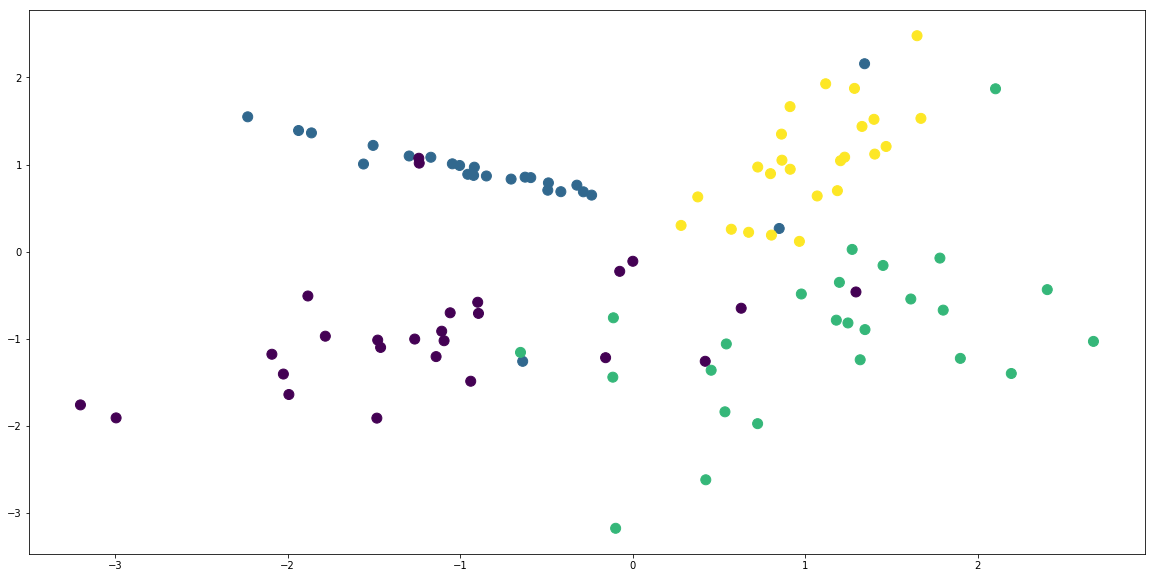

In [3]:
plt.figure(figsize(20, 10))
plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1], s=100)
plt.show()

In [4]:
accuracies = []
for k in range(1, 81):
    current_scores_sum = 0
    for train_indices, test_indices in model_selection.KFold(n_splits=5).split(data[0]):
        train_data = data[0][train_indices]
        train_labels = data[1][train_indices]
        test_data = data[0][test_indices]
        test_labels = data[1][test_indices]
        clf = neighbors.KNeighborsClassifier(n_neighbors=k)
        clf.fit(train_data, train_labels)
        predictions = clf.predict(test_data)
        score = metrics.accuracy_score(test_labels, predictions)
        current_scores_sum += score
    accuracies.append(current_scores_sum / 5)
accuracies = np.array(accuracies)

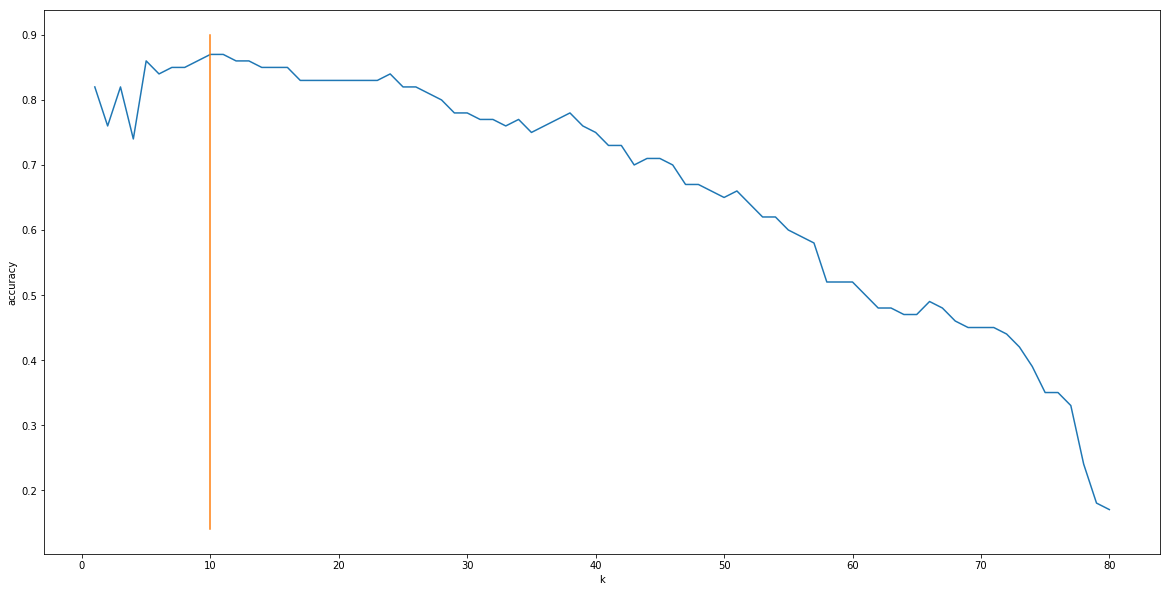

10


In [5]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, 81), accuracies)
plt.plot([np.argmax(accuracies) + 1, np.argmax(accuracies) + 1], 
         [np.min(accuracies) - 3e-2, np.max(accuracies) + 3e-2])
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()
print np.argmax(accuracies) + 1

Оптимальное k: 10

Теперь построим разделяющие поверхности:

In [6]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [7]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors, light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

In [8]:
def plot_knn_decision_surface(k):
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    train_data, test_data, train_labels, test_labels = \
        model_selection.train_test_split(data[0], data[1], test_size = 0.2)
    colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
    light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])
    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, colors, light_colors)

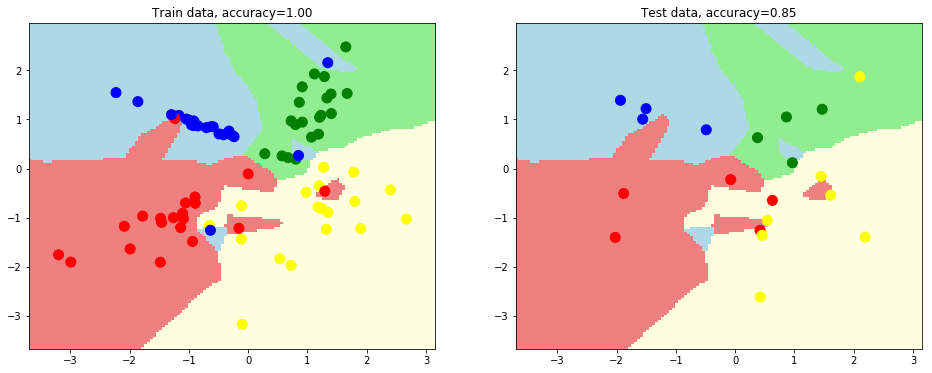

In [9]:
plot_knn_decision_surface(1)

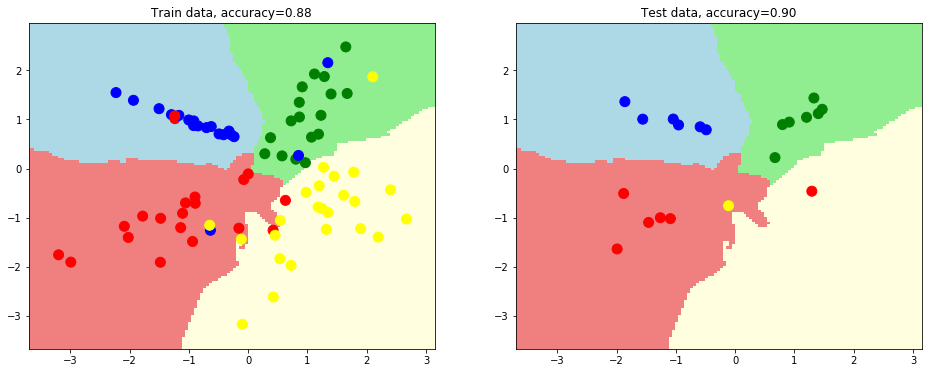

In [10]:
plot_knn_decision_surface(5)

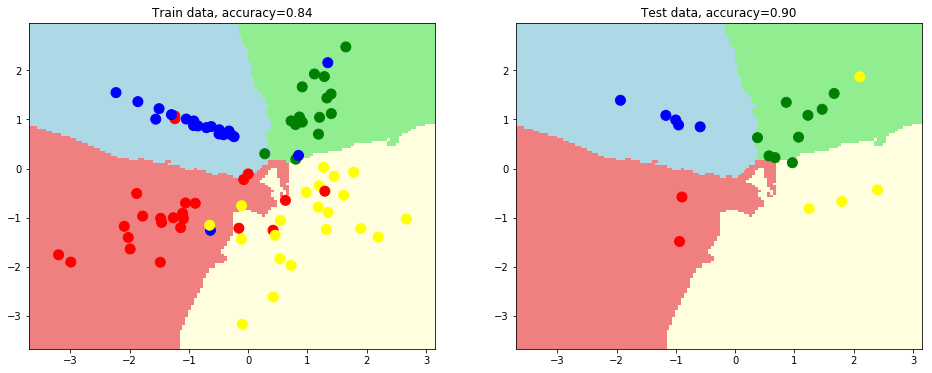

In [11]:
plot_knn_decision_surface(10)

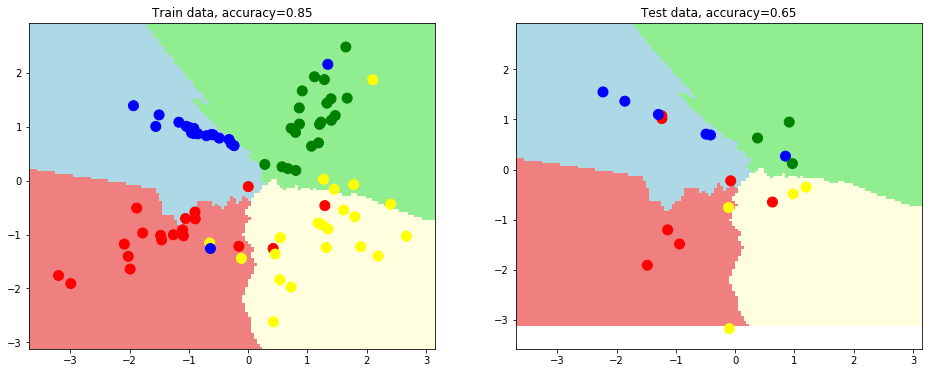

In [12]:
plot_knn_decision_surface(40)

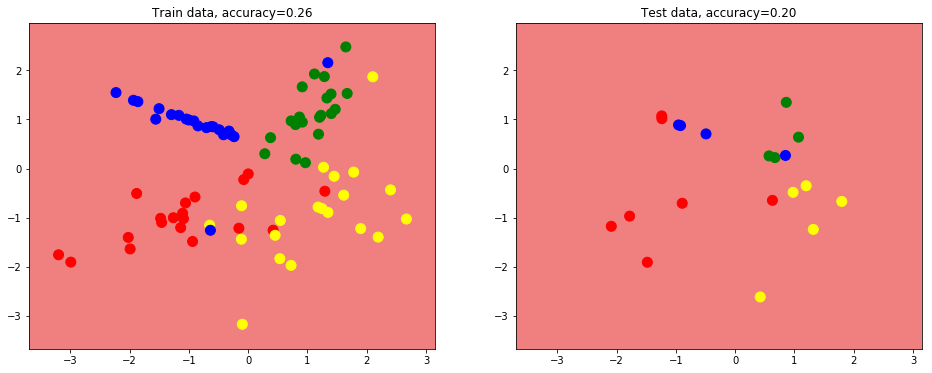

In [13]:
plot_knn_decision_surface(80)

# 2 Наивный байесовский классификатор

*Загрузите датасеты digits и breast_cancer из sklearn.datasets. Выведите несколько строчек
из обучающих выборок и посмотрите на признаки. С помощью sklearn.model_selection.cross_val_score
c настройками по умолчанию и вызова метода mean() у возвращаемого этой функцией numpy.ndarray,
сравните качество работы наивных байесовских классификаторов на этих двух датасетах. Для
сравнения предлагается использовать BernoulliNB, MultinomialNB и GaussianNB. Насколько
полученные результаты согласуются с вашими ожиданиями?
Два датасета, конечно, еще не повод делать далеко идущие выводы, но при желании вы
можете продолжить исследование на других выборках (например, из UCI репозитория).
Ответьте (прямо в ipynb блокноте с вашими экспериментами) на вопросы:*

1. *Каким получилось максимальное качество классификации на датасете breast_cancer?*

2. *Каким получилось максимальное качество классификации на датасете digits?*

3. *Какие утверждения из приведенных ниже верны?*

    (a) *На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли*

    (b) *На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным
    распределением*

    (c) *Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков*

    (d) *На вещественных признаках лучше всего сработало нормальное распределение*

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from pandas import DataFrame

In [15]:
data_digits = datasets.load_digits()
digits_frame = DataFrame(data_digits.data)
digits_frame['target'] = data_digits.target

In [16]:
digits_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [17]:
data_bc = datasets.load_breast_cancer()
bc_frame = DataFrame(data_bc.data)
bc_frame['target'] = data_bc.target

In [18]:
bc_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
for data, data_name in (data_digits, "Digits"), (data_bc, "Breast Cancer"):
    print "Dataset: %s" % data_name
    for estimator, est_name in \
        (BernoulliNB(), "Bernoulli"), (MultinomialNB(), "Multinomial"), \
        (GaussianNB(), "Gaussian"):
        print "Estimator: %s Score: %f" % (est_name, 
                         cross_val_score(estimator=estimator, X=data.data, y=data.target).mean())

Dataset: Digits
Estimator: Bernoulli Score: 0.825824
Estimator: Multinomial Score: 0.870877
Estimator: Gaussian Score: 0.818600
Dataset: Breast Cancer
Estimator: Bernoulli Score: 0.627420
Estimator: Multinomial Score: 0.894579
Estimator: Gaussian Score: 0.936749


*Насколько полученные результаты согласуются с вашими ожиданиями?*

В целом, хорошо. Понятно было, что BernoulliNB будет хуже всех (странно получать что-то хорошее, если предполагать, что данные бинарны когда они не бинарны). Также я предполагал, что на конечном множестве лучше будет мультиномиальное, а на континуальном (промежутке) -- гауссовское, потому что когда мы восстанавливаем такое распределение мы хотя бы делаем верное предположение о мощности множества ненулевой меры. 

Ответы на вопросы:

1. *Каким получилось максимальное качество классификации на датасете breast_cancer?*

    $0.936749 \approx 94\%$
    
2. *Каким получилось максимальное качество классификации на датасете digits?*

    $0.870877\approx 87 \%$
    
3. *Какие утверждения из приведенных ниже верны?*

    (a) *На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли*
     
     Нет (наоборот, хуже)
     
    (b) *На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным
    распределением*
     
     Нет (с нормальным)
     
    (c) *Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков*
    
    Смотря что иметь в виду под "лучше". Относительно других -- да. Но если говорить про абсолютное значение  качества, то нет.
    
    (d) *На вещественных признаках лучше всего сработало нормальное распределение*
     
     Да

# 3 Метрики в задаче регрессии

*Сгенерируйте датасет из 500 точек на плоскости, для которых $y = 0.5x + 1 + \varepsilon$, где $\varepsilon$
распределено нормально с матожиданием 0 и дисперсией 0.2.*

1. *Визуализируйте выборку.*

2. *Восстановите по выборке зависимость $y(x)$, считая, что зависимость имеет вид $y = kx+b$,
и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize.
Визуализируйте восстановленную прямую.*

3. *Добавьте теперь в выборку 75 точек, для которых $y  = -1 + \varepsilon$, а $x$ принимает различные
значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке. По
новой расширенной выборке снова попробуйте восстановить зависимость $y(x) = kx + b$
двумя способами: минимизируя MSE и минимизируя MAE. Визуализируйте полученные
прямые.*

4. *На основе полученных графиков сделайте вывод об устойчивости моделей, оптимизи-
рующих MSE и MAE к выбросам.*

In [20]:
from scipy import stats as sps
from scipy.optimize import minimize

In [21]:
x = sps.uniform.rvs(0, 100, size=500)
y = 0.5 * x + 1 + sps.norm.rvs(scale=0.2 ** 0.5, size=500)

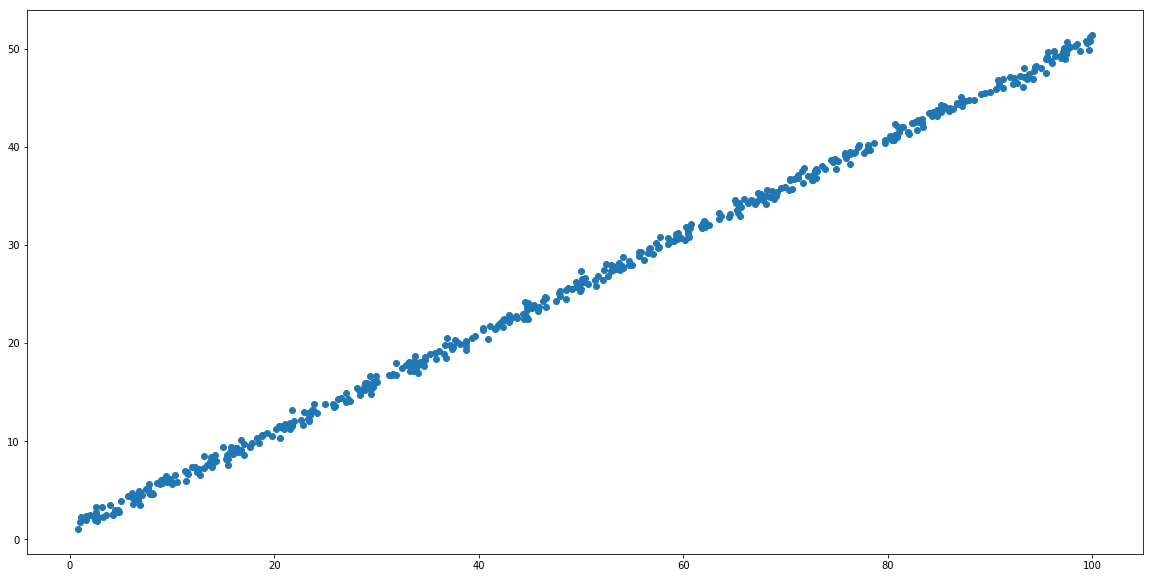

In [22]:
plt.figure(figsize=(20, 10))
plt.scatter(x, y)
plt.show()

In [23]:
def mse_func(args):
    k, b = args
    return ((k * x + b - y) ** 2).mean()

def mae_func(args):
    k, b = args
    return np.abs(k * x + b - y).mean()
    

In [24]:
res_mse = minimize(mse_func, [0, 0])
res_mae = minimize(mae_func, [0, 0])
print res_mse, res_mae

      fun: 0.20040803783563094
 hess_inv: array([[  5.97904889e-04,  -2.93406117e-02],
       [ -2.93406117e-02,   1.93981344e+00]])
      jac: array([ -5.58793545e-09,  -1.86264515e-09])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.49869665,  1.04479346])       fun: 0.358867146282802
 hess_inv: array([[  7.55892049e-03,  -3.59900290e-01],
       [ -3.59900290e-01,   1.77695012e+01]])
      jac: array([ 0.0038823,  0.       ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 504
      nit: 7
     njev: 123
   status: 2
  success: False
        x: array([ 0.49876211,  1.06667114])


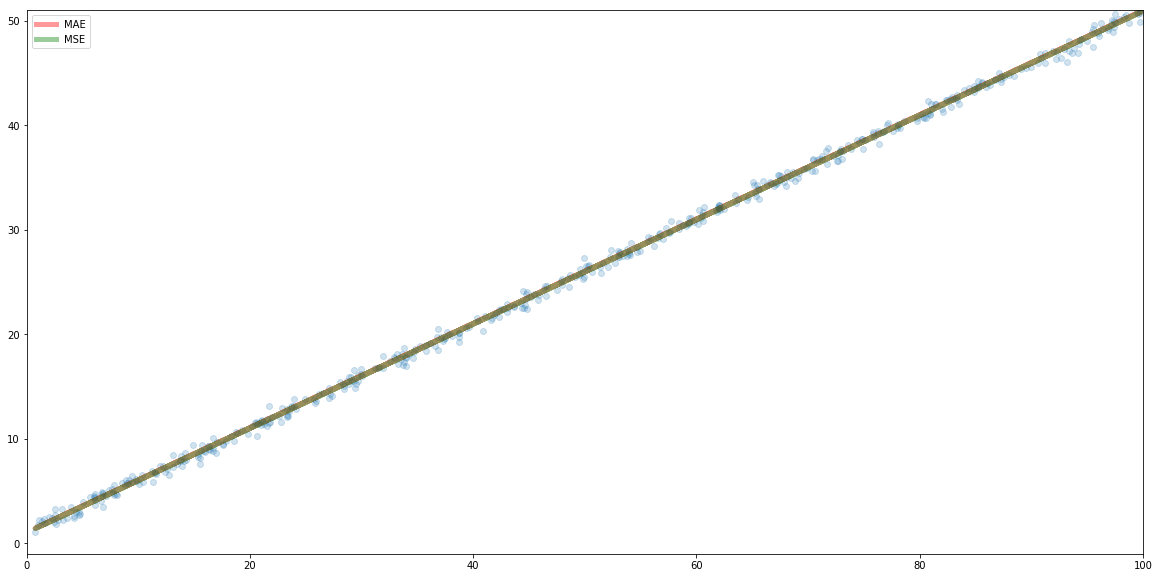

In [25]:
plt.figure(figsize=(20, 10))
plt.scatter(x, y, alpha=0.2)

plt.plot(x, res_mae.x[0] * x + res_mae.x[1], c='r', alpha=0.4, lw=5, label="MAE")
plt.plot(x, res_mse.x[0] * x + res_mse.x[1], c='g', alpha=0.4, lw=5, label="MSE")

plt.xlim(0, 100)
plt.ylim(-1, 51)
plt.legend()
plt.show()

In [26]:
x = np.append(x, sps.uniform.rvs(0, 100, size=75))
y = np.append(y, -1 + sps.norm.rvs(scale=0.2 ** 0.5, size=75))

In [27]:
res_mse = minimize(mse_func, [0, 0])
res_mae = minimize(mae_func, [0, 0])
print res_mse, res_mae

      fun: 102.46595416719569
 hess_inv: array([[  5.89677638e-04,  -2.88428040e-02],
       [ -2.88428040e-02,   1.91078301e+00]])
      jac: array([ -9.53674316e-07,  -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.43217448,  0.91872177])       fun: 3.6890668404155598
 hess_inv: array([[  1.03883567e-03,  -3.84209077e-02],
       [ -3.84209077e-02,   1.42638999e+00]])
      jac: array([-0.03240728, -0.00173911])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 424
      nit: 14
     njev: 103
   status: 2
  success: False
        x: array([ 0.50017502,  0.90419218])


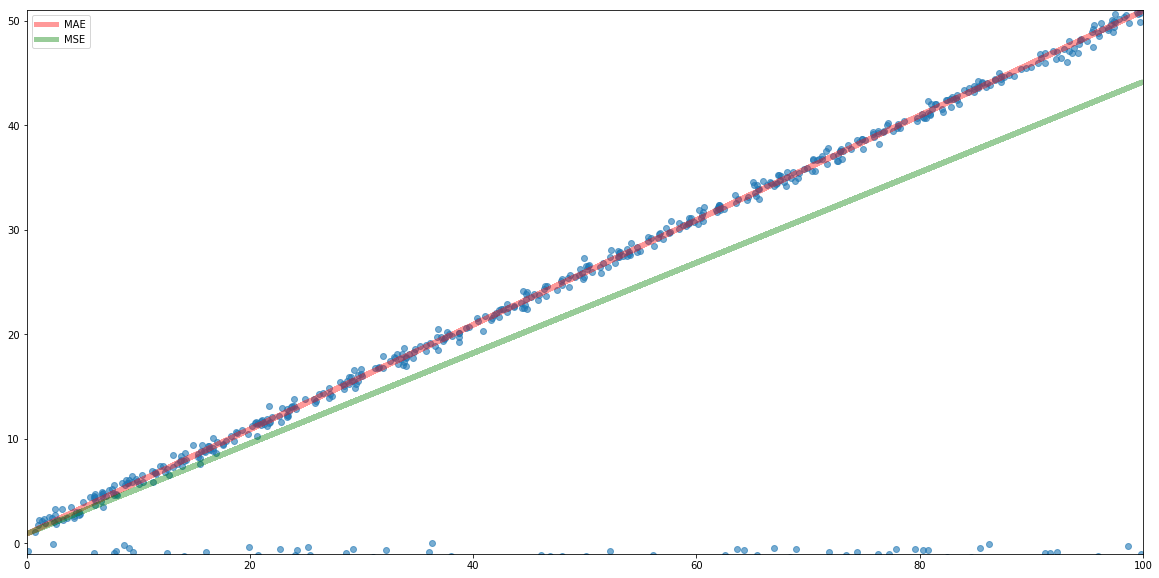

In [33]:
plt.figure(figsize=(20, 10))
plt.scatter(x, y, alpha=0.6)

plt.plot(x, res_mae.x[0] * x + res_mae.x[1], c='r', alpha=0.4, lw=5, label="MAE")
plt.plot(x, res_mse.x[0] * x + res_mse.x[1], c='g', alpha=0.4, lw=5, label="MSE")

plt.xlim(0, 100)
plt.ylim(-1, 51)
plt.legend()
plt.show()

Вывод: оптимизация MAE более устойчива к выбросам, нежели оптимизация MSE

In [29]:
xi = sps.bernoulli(p = 1.0 / 3)

In [30]:
X = xi.rvs(size=100)

In [31]:
 X[:50].sum() * 1.0 / X[50:].sum()

1.5555555555555556